
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **05. Deep Neural Networks (DNN): Regression and Classification** </center>



## <span style="color:red"> Outline </span> 
1. [**Activations, optimizers and other tricks**](#Act)
2. [**DNN in regression: applications**](#DNN_reg)
3. [**DNN in classification: applications**](#DNN_class)



In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA2-20231-H1" #@param {type:"string"}
assignment_id = group_id +'.dl_DNN'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/main/academic/courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-professor


In [ ]:
#@title **Load libraries**
#@markdown Here is **important to change** to GPU  


import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

#**1. Activations, optimizers and other tricks**  <a name="Act"></a>

- ### **Activation functions**

Introduce the non-linearity into the output of a neuron. This is **important** since most real world data is non-linear. Then, we want neurons to learn non-linear representations.


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/actifunc.png" width="400"> 



Function                                          | $f(x)$|  $\frac{\partial f(x)}{\partial x}$
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       | 
$$Sigmoid = $$  |  $$ \large \frac{1}{1 + e^{-x}}$$   | $$\large f(x)(1-f(x))$$|
$$Tanh = $$     | $$\large \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$|$$\large (1-(f(x)^{2})$$|
$$ReLU = $$     | $$\large \max(0.01x, x)$$|$$\large \left\{\begin{matrix}
0.01 & \text{if} & x<0 \\ 
1    & \text{if} &  x>0
\end{matrix}\right.$$|

</center>

[Keras activations](https://keras.io/api/layers/activations/)


- ### **Optimizers**

  -   **Stochastic gradient descent (SGD):** uses a single data sample randomly selected to calculate gradient descent and update weights at every iteration. 
  -  **Mini-batch gradient:** uses a mini-batch of samples, randomly selected at each iteration. Converge faster and it more stable than SGD
 
  - **Momentum** compute speed of gradient and  helps accelerate SGD in the relevant direction: 

  $$
\begin{matrix}
\upsilon_t := \gamma\upsilon_{t-1} +\eta \frac{\partial \mathbf{J(W)}}{\partial W}
\\ 
\\
W_{i,j}^{l} := W_{i,j}^{l} - \upsilon_t 
\end{matrix}$$

  - **AdaGrad Optimizer:** Change learning rate parameter according to sparsity of data. Then smaller updates are performed for frequently features.  $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{\partial J + \epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$ 
     
  - **Adadelta Optimizer:** $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{(1-\gamma )\partial J_{t-1} +  \gamma\partial J_t +\epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$
  
  - **RMSprop:**  divides the learning rate by an exponentially decaying average of squared gradients [RMSprop-Hinton](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)

 - **Adam:** **Ada**ptive **M**oment Estimation computes adaptive learning rates for each parameter

  $$
\begin{matrix}
m_t := \beta_1m_{t-1} +(1-\beta_1) \frac{\partial \mathbf{J(W)}}{\partial W}
\\ 
\\
\upsilon_t := \beta_2\upsilon_{t-1} +(1-\beta_2) \frac{\partial \mathbf{J(W)^{2}}}{\partial W}
\\
\\
W_{i,j}^{l} := W_{i,j}^{l} - \frac{\eta }{\sqrt{\upsilon_t+\epsilon}}\hat{m}_t 
\end{matrix}$$

Where $m_t, \upsilon_t$ approximates the mean and variance, respectively. In same sense, there exist many other approximations like **AMSGrad, Nadam, Adadelta, ...**


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/optmized_simul.gif" width="400"></center>


[Simulation](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/)

# **2. DNN in regression: applications**  <a name="DNN_reg"></a>

Now, we goint to use all these concepts to deal with real machine learning problems. Firstly, we will load the well know `boston_housing`



In [ ]:
import tensorflow as tf

dataset = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
[x_train, y_train], [x_test, y_test] = dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57026/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Bult a DNN of four layers, with activation relu. 
  - Define three dense hidden layers of 64 neurons
  - In output layer **Remember** that is a regression problem. 
  - Use optimized `RMSprop(0.001)`
  - compile loss as `mse`



In [ ]:
#@title **Student code**
def build_RMSprop_model(x_train):
  # Importing allowed libraries
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras

  """ 
  Put your code here 
  """ 

  return

In [ ]:
#@title ## **Send your answer**
student_func_str = inspect.getsource(build_RMSprop_model)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


In [ ]:
#@title **Coding:** now it is time to train the model
iterations = 100
history = model.fit(x_train, y_train, epochs=iterations,  validation_split = 0.2)

Epoch 1/100
11/11 [==============================] - 5s 23ms/step - loss: 233.3669 - mae: 11.5517 - mse: 233.3669 - val_loss: 74.6230 - val_mae: 6.6086 - val_mse: 74.6230
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 108.4642 - mae: 8.0299 - mse: 108.4642 - val_loss: 471.5500 - val_mae: 19.9098 - val_mse: 471.5500
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 110.8425 - mae: 7.7780 - mse: 110.8425 - val_loss: 110.1319 - val_mae: 9.2076 - val_mse: 110.1319
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 132.2477 - mae: 9.1609 - mse: 132.2477 - val_loss: 132.1755 - val_mae: 8.2739 - val_mse: 132.1755
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 72.1485 - mae: 6.3878 - mse: 72.1485 - val_loss: 110.1812 - val_mae: 7.1647 - val_mse: 110.1812
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 86.8016 - mae: 7.0426 - mse: 86.8016 - val_loss: 108.2972 - val_mae: 9.22

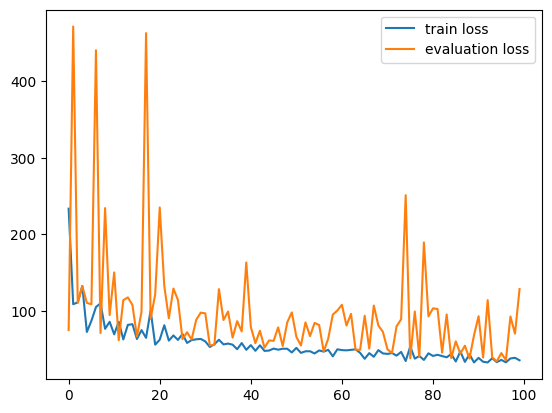

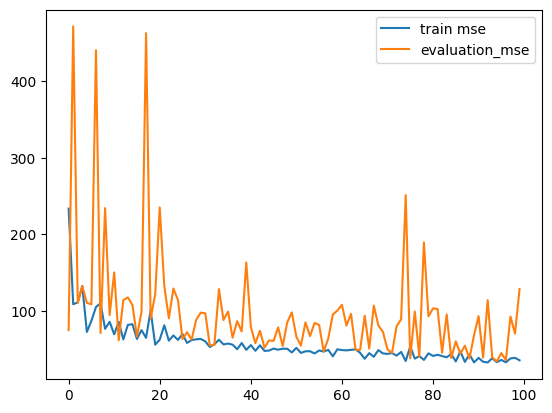

In [ ]:
#@title **Coding:** ploting the performance of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['mse'], label='train mse');
plt.plot(history.history['val_mse'], label='evaluation_mse');
plt.legend()
plt.show()

In [ ]:
#@title **Coding:** Now, we have to evaluate the model
loss, mae, mse = model.evaluate(x_test, y_test)
loss, mae, mse

4/4 [==============================] - 0s 4ms/step - loss: 165.2494 - mae: 10.7183 - mse: 165.2494


(165.24942016601562, 10.718342781066895, 165.24942016601562)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, change the layers, optimizer, activations and get a better result!


# **3. DNN in classification: applications** <a name="DNN_class"></a>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_5.png" width="400" >

In this case, we use a **one hot encoding** to give an answer. So, each neuron respond to a specific class and in last layer sigmoids are implemented. 

Now, we going to test the power of DNN in non-linear data. We going to load the next data: 


X:  (10000, 2)  Y:  (10000,)
(7000, 2) (3000, 2) (7000,) (3000,)
categorical y_train:  (7000, 2)
categorical y_test:  (3000, 2)


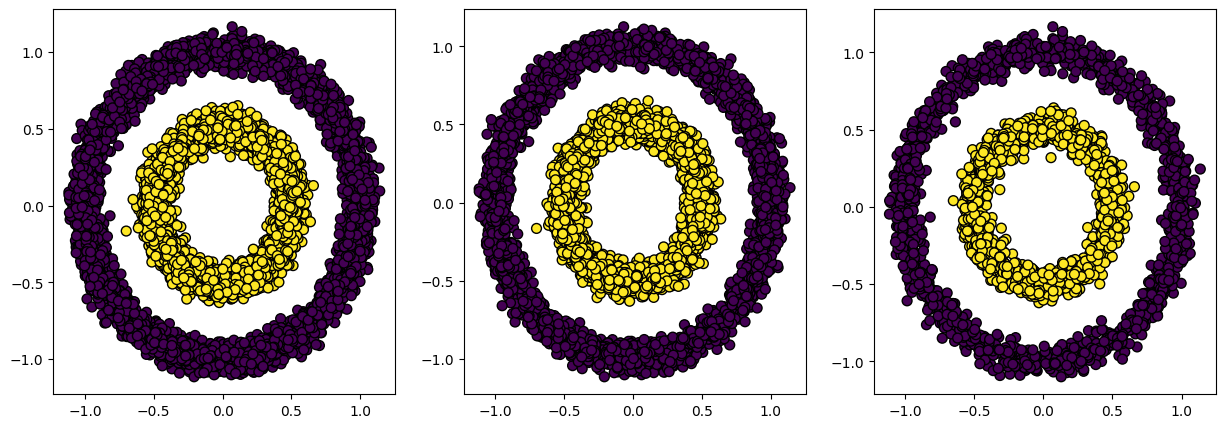

In [ ]:
#@title **Coding** we can deal with non-linear boundaries!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=10000, factor=0.5, random_state=0, noise=0.05)
print("X: ", X.shape, " Y: ", Y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, edgecolor='k')

y_test = tf.keras.utils.to_categorical(y_test, num_classes=2, dtype='float32')
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
print("categorical y_train: ", y_train.shape)
print("categorical y_test: ", y_test.shape)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement DNN of above figure for the above toy dataset. 
- Use relu for hidden layer

In [ ]:
#@title **Student code:** Build a DNN architecture
model = ....
model.summary()                            

- Use an Adam optimizer
- Use a loss `'binary_crossentropy'`
- metrics should be `['binary_accuracy']`



In [ ]:
#@title **Student code** Now, compile the model
model.compile(...)

In [ ]:
#@title **Coding** train the model
history = model.fit(
    x_train, y_train,
    epochs=150, 
    validation_split = 0.2, 
    verbose=False)

In [ ]:
#@title **Coding** evaluating the model
loss, acc = model.evaluate(x_test, y_test)
loss, acc

94/94 [==============================] - 0s 3ms/step - loss: 0.4220 - binary_accuracy: 0.8010


(0.42199525237083435, 0.8009999990463257)

94/94 [==============================] - 0s 1ms/step
[1 1 0 ... 1 1 1]
(3000, 2)
(3000,)


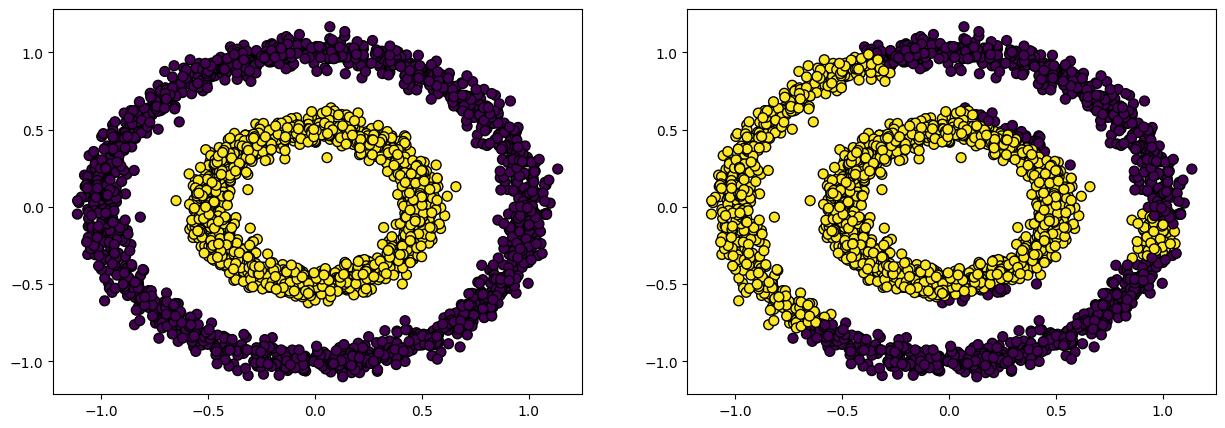

In [ ]:
#@title **Coding** Draw the prediction of the model, it should be almost perfect!
y_estimated = model.predict(x_test)
y_estimated = y_estimated.argmax(axis=-1)
print(y_estimated)
print(y_test.shape)
print(np.argmax(y_test ,axis=-1).shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(y_test ,axis=1), s=50, edgecolor='k')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_estimated, s=50, edgecolor='k')

Now , we are going to work in a more real dataset. We we load the Breast cancer dataset








mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890        0.0  
1          0.2750                  0.08902        0.0  

[2 rows x 31 columns]

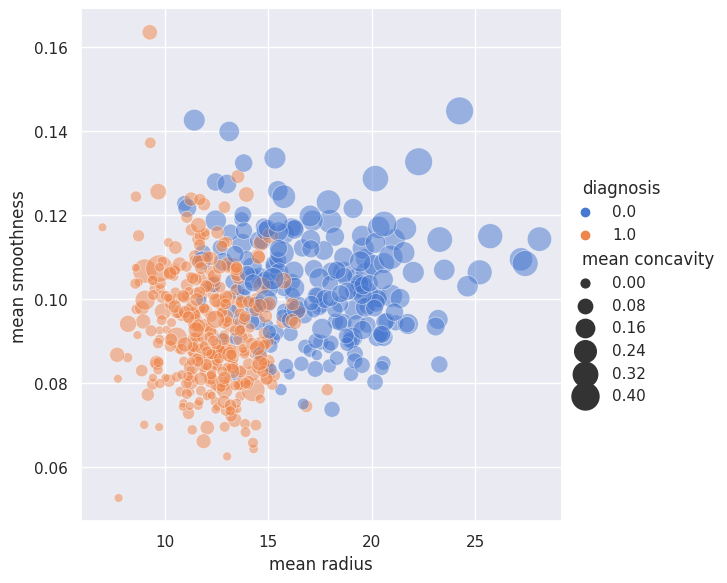

In [ ]:
#@title **Coding: Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}

import io
import requests
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()

cancer = load_breast_cancer()

cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **Coding** time to select the features 
# Indicate the classification variable
Y = cancer.target
Y = tf.keras.utils.to_categorical(Y, num_classes=2, dtype='float32')
# Concatenate to form the training data
X = cancer.data

In [ ]:
#@title **Coding** spliting data
from sklearn.model_selection import train_test_split
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(569, 30) (569, 2)


((398, 30), (171, 30), (398, 2), (171, 2))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement DNN for leaf_class_1.csv 
- Use almost three hidden layers
- **Remember** that is a classification problem to implement last layer
- Use any optimizer as you prefer
- Compile with `binary_accuracy`



In [ ]:
#@title **Student code for the solution** Build the DNN
def build_binary_accuracy_model():
  # Importing allowed libraries
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  
  """ 
  Put your code here 
  """ 

  return

In [ ]:
 #@title ## **Send your answer**
student_func_str = inspect.getsource(build_binary_accuracy_model)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


In [ ]:
#@title **Coding** fitting the model
iterations = 10

history = model.fit(
  x_train, y_train,
  epochs=iterations, 
  validation_split = 0.2, verbose=False)

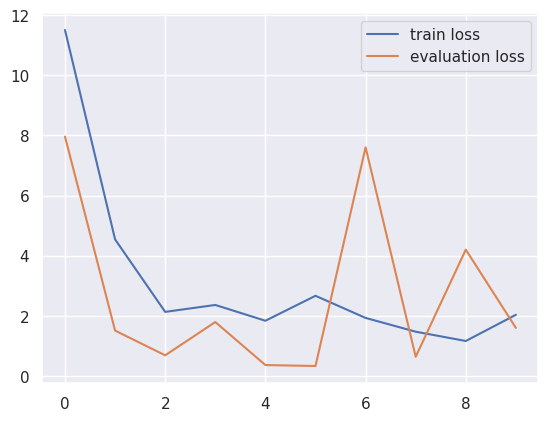

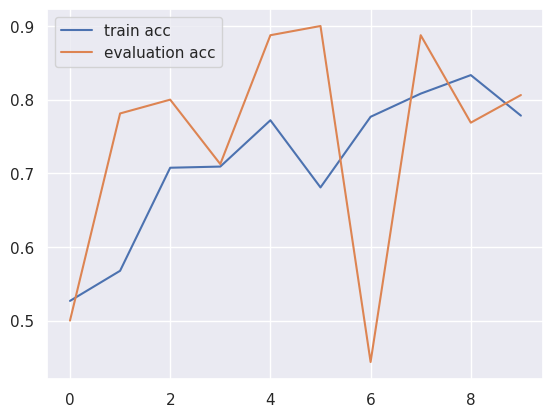

In [ ]:
#@title **Coding** plots
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['binary_accuracy'], label='train acc');
plt.plot(history.history['val_binary_accuracy'], label='evaluation acc');
plt.legend()
plt.show()

In [ ]:
#@title **Coding** evaluate the model in testing set
loss, acc = model.evaluate(x_test, y_test)
loss, acc

6/6 [==============================] - 0s 3ms/step - loss: 1.5467 - binary_accuracy: 0.8158


(1.5467445850372314, 0.8157894611358643)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

A main challenge on data analysis is related with image classification. There exist a family of `mnist` datasets that could be used to play in this domain. 

- Implement a DNN for `mnist` dataset. You can use `fashion-mnist` or `digit-mnist`

- Report the scores. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/ANNs.gif" width="400" >


# References

[1. How the backpropagation algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)

[2. **Momentum** Qian, N. (1999). On the momentum term in gradient descent learning algorithms. Neural Networks : The Official Journal of the International Neural Network Society, 12(1), 145–151.](http://doi.org/10.1016/S0893-6080(98)00116-6)

[3. Keras activations](https://keras.io/api/layers/activations/)

[4. Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12, 2121–2159 ](http://jmlr.org/papers/v12/duchi11a.html)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">